Load Processed Data and Prepare Inputs

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load cleaned dataset
df = pd.read_csv('../data/processed/cleaned_data.csv')

# Split into features (X) and target (y)
X = df.drop(columns=['Calories']).values
y = df[['Calories']].values

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (important for gradient-based optimization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Build and Compile the Model

In [3]:
import tensorflow as tf

# Define a simple linear model with multiple inputs
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='mean_squared_error')


Train the Model

In [4]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, verbose=1)


Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 2503.7991
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 172.5656
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 139.9382
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 130.9380
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 132.4664
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 130.0597
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 125.7477
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 129.4296
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 129.8009
Epoch 10/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 125.9718
Epoch 11/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 126.1842
Epoch 12/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 126.9536
Epoch 13/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 130.1583
Epoch 14/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - l

Plot Loss Curve

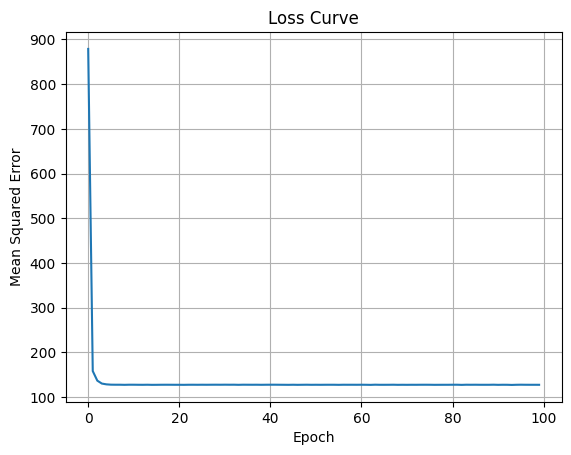

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


Evaluate the Model

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R²: {r2:.2f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
Test MSE: 131.89
Test R²: 0.97


Inspect Learned Weights

In [7]:
weights, bias = model.layers[0].get_weights()
print("Feature Weights:", weights.flatten())
print("Bias:", bias[0])


Feature Weights: [ -0.40916497   8.549349    -2.2528288    4.487448    55.004585
  18.994347   -13.305619  ]
Bias: 89.25391


In [8]:
feature_names = df.drop(columns=['Calories']).columns
for name, weight in zip(feature_names, weights.flatten()):
    print(f"{name}: {weight:.4f}")


Gender: -0.4092
Age: 8.5493
Height: -2.2528
Weight: 4.4874
Duration: 55.0046
Heart_Rate: 18.9943
Body_Temp: -13.3056


Save Feature Weight Bar Chart

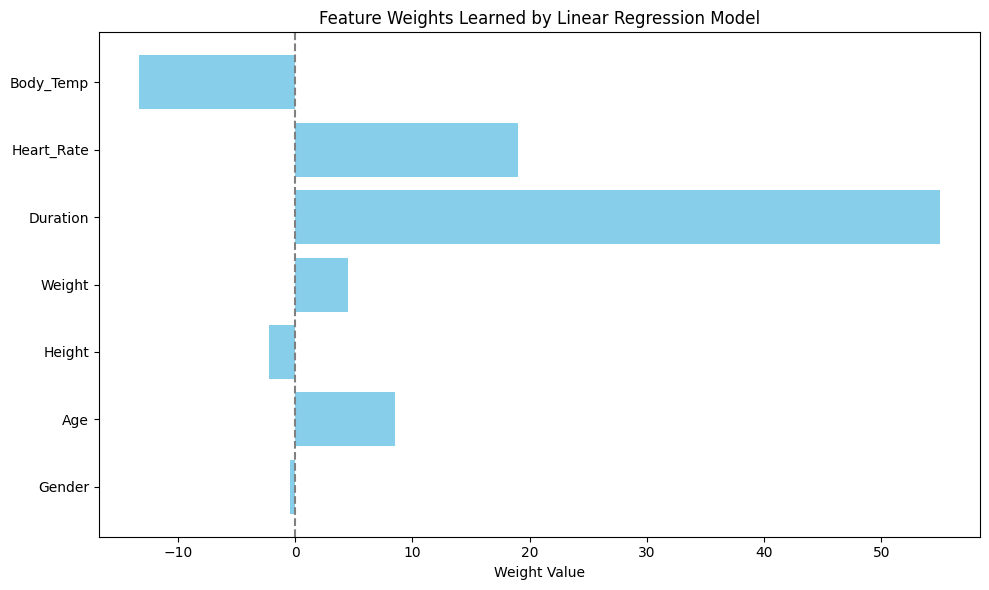

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Create directory if not exists
os.makedirs('../outputs/plots', exist_ok=True)

# Plot feature weights
plt.figure(figsize=(10, 6))
plt.barh(feature_names, weights.flatten(), color='skyblue')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Feature Weights Learned by Linear Regression Model')
plt.xlabel('Weight Value')
plt.tight_layout()

# Save plot
plt.savefig('../outputs/plots/feature_weights.png')
plt.show()
